In [18]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [19]:
# Randomly check the equivalence between the maximal eigenvalue problem and the optimization problem

dim = 4
M = np.random.randn(dim, dim)
M = M + M.T  # 对称化以保证本征分解存在
print(M)

lm, u = np.linalg.eig(M)
print('\n Eigenvalues:')
print(lm)

print('\n Eigenvectors:')
print(u)

n_max = np.argmax(abs(lm))
lm_max = lm[n_max]
v_max = u[:, n_max]
print('\n The ' + str(n_max) + '-th eigenvalue is the maximal one')
print('Dominant eigenvalue = ' + str(lm_max))
print('Dominant eigenvector = ')
print(v_max)

[[ 0.07531964 -2.27123985 -1.79719778 -0.72555904]
 [-2.27123985  0.28488956  0.22350598  1.80939653]
 [-1.79719778  0.22350598  4.93096436 -1.08478098]
 [-0.72555904  1.80939653 -1.08478098  2.23580801]]

 Eigenvalues:
[-2.34367856 -0.07734436  5.76485231  4.18315217]

 Eigenvectors:
[[-0.70463787 -0.49136096 -0.31950883 -0.39995498]
 [-0.68506563  0.44851639  0.11779596  0.56182047]
 [-0.13405269 -0.34027402  0.92672952 -0.08611542]
 [ 0.1272809  -0.66453822 -0.15877852  0.71901175]]

 The 2-th eigenvalue is the maximal one
Dominant eigenvalue = 5.764852308449495
Dominant eigenvector = 
[-0.31950883  0.11779596  0.92672952 -0.15877852]


f from the product of M and v_max = 5.764852308449491
The largest eigenvalue = 5.764852308449495


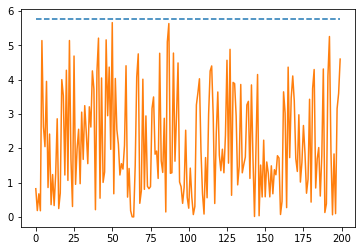

In [20]:
f_max = abs(v_max.dot(M).dot(v_max))
print('f from the product of M and v_max = ' + str(f_max))
print('The largest eigenvalue = ' + str(lm_max))

num_v = 200
#  随机建立多个归一化向量
vecs = np.random.randn(num_v, dim)
vecs = np.einsum('na,n->na', vecs, 1/np.linalg.norm(vecs, axis=1))
# 计算每个向量的f
f = abs(np.einsum('na,ab,nb->n', vecs, M, vecs.conj()))

# 画图展示由最大本征值给出的
x = np.arange(num_v)
y = np.ones(num_v, ) * f_max
plt.plot(x, y, '--')
plt.plot(x, f)
plt.show()


In [21]:
# 使用scipy中的eigs仅求最大几个本征值与本征向量，节省计算量
import scipy.sparse.linalg as la

lm1, v1 = la.eigs(M, k=1, which='LM')
print('The dominant eigenvalue and eigenvector by eigs:')
print(lm1)
print(v1.reshape(-1, ))

print('\nThe dominant eigenvalue and eigenvector by eig:')
print(lm_max)
print(v_max.reshape(-1, ))

The dominant eigenvalue and eigenvector by eigs:
[5.76485231+0.j]
[ 0.31950883+0.j -0.11779596+0.j -0.92672952+0.j  0.15877852+0.j]

The dominant eigenvalue and eigenvector by eig:
5.764852308449495
[-0.31950883  0.11779596  0.92672952 -0.15877852]


In [22]:
def eig0(mat, it_time=100, tol=1e-15):
    """
    :param mat: 输入矩阵（实对称阵）
    :param it_time: 最大迭代步数
    :param tol: 收敛阈值
    :return lm: （绝对值）最大本征值
    :return v1: 最大本征向量
    """
    # 初始化向量
    v1 = np.random.randn(mat.shape[0],)
    v0 = copy.deepcopy(v1)
    lm = 1
    for n in range(it_time):  # 开始循环迭代
        v1 = mat.dot(v0)  # 计算v1 = M V0
        lm = np.linalg.norm(v1)  # 求本征值
        v1 /= lm  # 归一化v1
        # 判断收敛
        conv = np.linalg.norm(v1 - v0)
        if conv < tol:
            break
        else:
            v0 = copy.deepcopy(v1)
    return lm, v1

In [23]:
lm2, v2 = eig0(M)

print('\nThe dominant eigenvalue and eigenvector by the iterative method:')
print(lm2)
print(v2.reshape(-1, ))


The dominant eigenvalue and eigenvector by eig:
5.764852308449492
[ 0.31950883 -0.11779596 -0.92672952  0.15877852]
